# **Waze Project**
**Course 6 - The nuts and bolts of machine learning**

Your team is close to completing their user churn project. Previously, you completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, you built a binomial logistic regression model based on multiple variables.

Leadership appreciates all your hard work. Now, they want your team to build a machine learning model to predict user churn. To get the best results, your team decides to build and test two tree-based models: random forest and XGBoost.

Your work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.


# **Course 6 End-of-Course Project: Build a machine learning model**

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Build a machine learning model**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?

3.  Do the benefits of such a model outweigh the potential problems?
4.  Would you proceed with the request to build this model? Why or why not?



==> ENTER YOUR RESPONSES TO QUESTIONS 1-4 HERE
1. I am being asked to build a model that predicts user churn based on available user data.
2. Ethical implications of the model may include whether user churn is predicted based on unseen factors like user location, socioeconomic status, or other demographic features that are indirectly captured by the data. For the business, the consequences of the model making errors could be that the business loses valuable users, which could cost the company time and resources. If the model predicts too many false negatives, it is not addressing the goal of identifying users that will churn, which means that the company misses out on opportunities to improve user retention. If the model predicts too many false positives, it could lead to the company investing too many resources in retaining users that were not actually at risk of churning.
3. Yes, I believe the benefits of the model outweigh potential problems. If we can identify why users churn, the company may be able to improve their services to all users. This may include identification of underserved user groups.
4. Yes, I would proceed with building the model to gain insight into how the service could be improved.

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [32]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import pickle

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
### YOUR CODE HERE ###
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# This is the function that helps plot feature importance
#from xgboost import plot_importance

# # This module lets us save our models once we fit them.
#import pickle

Now read in the dataset as `df0` and inspect the first five rows.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [4]:
# Inspect the first five rows
### YOUR CODE HERE ###
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**
Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. You know that some features had stronger correlations with churn than others, and you also created some features that may be useful.

In this part of the project, you'll engineer these features and some new features to use for modeling.

To begin, create a copy of `df0` to preserve the original dataframe. Call the copy `df`.

In [5]:
# Copy the df0 dataframe
### YOUR CODE HERE ###
df = df0.copy()

Call `info()` on the new dataframe so the existing columns can be easily referenced.

In [6]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### **`km_per_driving_day`**

1. Create a feature representing the mean number of kilometers driven on each driving day in the last month for each user. Add this feature as a column to `df`.

2. Get descriptive statistics for this new feature



In [7]:
# 1. Create `km_per_driving_day` feature
### YOUR CODE HERE ###
df['km_per_driving_day'] = df['driven_km_drives'] /df['driving_days']

# 2. Get descriptive stats
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,inf
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


Notice that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [8]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)

# 2. Confirm that it worked
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110


#### **`percent_sessions_in_last_month`**

1. Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

2. Get descriptive statistics for this new feature

In [9]:
# 1. Create `percent_sessions_in_last_month` feature
### YOUR CODE HERE ###
# IT WAS NECESSARY TO ROUND THE total_sessions COLUMN.
# THIS PREVENTED PERCENTAGES FROM EXCEEDING 100% DUE TO SLIGHTLY SMALLER total_sessions VALUES THAN sessions VALUES.
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions'].round().astype(int) * 100

# 1. Get descriptive stats
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'].describe()

count    14998.000000
mean        44.924681
std         28.682943
min          0.000000
25%         19.651701
50%         42.307692
75%         68.750000
max        100.000000
Name: percent_sessions_in_last_month, dtype: float64

In [10]:
# CONFIRM THAT NO PERCENTAGES EXCEED 100.
temp = df[df['percent_sessions_in_last_month'] > 100]
temp

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month


#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [11]:
# Create `professional_driver` feature
### YOUR CODE HERE ###
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,95.286195,1
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,40.672783,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,83.823529,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,72.058824,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,50.000000,1
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,40.357143,0
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,1.265823,0
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,22.159091,0
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,30.978261,0
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,34.285714,0


#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [12]:
# Create `total_sessions_per_day` feature
### YOUR CODE HERE ###
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,95.286195,1,0.130381
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,40.672783,0,0.266854
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,83.823529,0,0.051121
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,72.058824,0,4.505948
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,50.000000,1,0.107713


As with other features, get descriptive statistics for this new feature.

In [13]:
# Get descriptive stats
### YOUR CODE HERE ###
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [15]:
# Create `km_per_hour` feature
### YOUR CODE HERE ###
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

These numbers clearly don't make sense. The median value is >122km/hr (~75mph), and the 75th percentile is >193km/hr (~120mph), and the maximum value is not even possible.

NOTE: after checking the exemplar, it also simply states that these are unreasonable values and would require you checking with the Waze team to gain a clearer understanding of the data.

#### **`km_per_drive`**

Create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [16]:
# Create `km_per_drive` feature
### YOUR CODE HERE ###
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

This feature has infinite values too. Convert the infinite values to zero, then confirm that it worked.

In [17]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###
df['km_per_drive'] = df['km_per_drive'].replace(np.inf, 0)

# 2. Confirm that it worked
### YOUR CODE HERE ###
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [18]:
# Create `percent_of_sessions_to_favorite` feature
### YOUR CODE HERE ###
df['percent_of_sessions_to_favorite'] = (df['total_navigations_fav1'] + df['total_navigations_fav2'] ) / df['total_sessions'] *100

# Get descriptive stats
### YOUR CODE HERE ###
df['percent_of_sessions_to_favorite'].describe()

count    14999.000000
mean       166.543919
std        886.566603
min          0.000000
25%         20.347103
50%         64.981807
75%        163.852641
max      77756.362912
Name: percent_of_sessions_to_favorite, dtype: float64

In [20]:
# NOT SURE WHY SO MANY ROWS HAVE PERCENTAGES GREATER THAN 100...SOME USERS HAVE TOTAL NAVIGATIONS
# TO FAVORITES THAT FAR EXCEED THEIR TOTAL SESSIONS.
# THIS IS NOT ADDRESSED IN THE EXEMPLAR
df[df['percent_of_sessions_to_favorite'] > 100]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,72.058824,0,4.505948,93.351141,22.839778,486.764004
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,50.000000,1,0.107713,194.342970,58.091206,101.636273
15,15,retained,23,22,95.292159,50,193,0,2188.829771,1775.713499,11,10,iPhone,218.882977,24.210526,0,1.905843,73.958883,99.492262,202.535026
16,16,retained,30,25,41.538372,1554,61,19,1213.549279,949.130125,17,13,Android,93.349945,71.428571,0,0.026730,76.715463,48.541971,192.593007
20,20,retained,52,42,144.714103,2937,306,0,1601.896284,951.889139,7,7,iPhone,228.842326,35.862069,0,0.049273,100.971608,38.140388,211.451403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,14988,churned,13,11,41.804981,770,132,87,1533.521450,823.418616,0,0,Android,0.000000,30.952381,0,0.054292,111.743025,139.411041,523.861018
14989,14989,retained,6,6,153.373616,2988,371,24,1553.284152,833.421155,23,20,iPhone,77.664208,3.921569,0,0.051330,111.824674,258.880692,257.541035
14991,14991,churned,50,41,102.444592,1463,0,121,4094.536313,2201.984210,4,2,iPhone,2047.268157,49.019608,0,0.070024,111.568547,99.866739,118.112628
14993,14993,NaN,67,57,97.570074,1131,207,102,2267.052913,318.120634,27,26,iPhone,87.194343,68.367347,0,0.086269,427.583627,39.772858,316.695464


### **Task 3. Drop missing values**

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [21]:
# Drop rows with missing values
### YOUR CODE HERE ###
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())

ID                                   0
label                              700
sessions                             0
drives                               0
total_sessions                       0
n_days_after_onboarding              0
total_navigations_fav1               0
total_navigations_fav2               0
driven_km_drives                     0
duration_minutes_drives              0
activity_days                        0
driving_days                         0
device                               0
km_per_driving_day                   0
percent_sessions_in_last_month       1
professional_driver                  0
total_sessions_per_day               0
km_per_hour                          0
km_per_drive                         0
percent_of_sessions_to_favorite      0
dtype: int64
ID                                 0
label                              0
sessions                           0
drives                             0
total_sessions                     0
n_days_after_onboardin

### **Task 4. Outliers**

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Task 5. Variable encoding**

#### **Dummying features**

In order to use `device` as an X variable, you will need to convert it to binary, since this variable is categorical.

In cases where the data contains many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Each possible category of each feature will result in a feature for your model, which could lead to an inadequate ratio of features to observations and/or difficulty understanding your model's predictions.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [24]:
# Create new `device2` variable
### YOUR CODE HERE ###
df['device2'] = pd.get_dummies(df['device'], dtype=int, drop_first=True)
df[['device','device2']].head(10)

,device,device2
0,Android,0
1,iPhone,1
2,Android,0
3,iPhone,1
4,Android,0
5,iPhone,1
6,iPhone,1
7,iPhone,1
8,Android,0
9,iPhone,1


#### **Target encoding**

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Change the data type of the `label` column to be binary. This change is needed to train the models.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` so as not to overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [26]:
# Create binary `label2` column
### YOUR CODE HERE ###
df['label2'] = df['label'].map({'retained':0, 'churned':1})
df[['label', 'label2']].head(10)

,label,label2
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0
5,retained,0
6,retained,0
7,retained,0
8,retained,0
9,churned,1


### **Task 6. Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

Note, however, that `device` won't be used simply because it's a copy of `device2`.

Drop `ID` from the `df` dataframe.

In [27]:
# Drop `ID` column
### YOUR CODE HERE ###
df = df.drop('ID', axis=1)

### **Task 7. Evaluation metric**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [28]:
# Get class balance of 'label' col
### YOUR CODE HERE ###
df['label'].value_counts(normalize=True)

label
retained    0.822633
churned     0.177367
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 8. Modeling workflow and model selection process**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### **Task 9. Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable `X` that isolates the features. Remember not to use `device`.

2. Define a variable `y` that isolates the target variable (`label2`).

3. Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [35]:
# 1. Isolate X variables
### YOUR CODE HERE ###
print(df.shape)
X = df.drop(['label', 'label2', 'device'], axis=1)
print(X.shape)

# 2. Isolate y variable
### YOUR CODE HERE ###
y = df['label2']
print(y.shape)

# 3. Split into train and test sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

# 4. Split into train and validate sets
### YOUR CODE HERE ###
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=X_test.shape[0], random_state=12)

(14298, 21)
(14298, 18)
(14298,)


Verify the number of samples in the partitioned data.

In [36]:
### YOUR CODE HERE ###
print([x.shape for x in (X_train, X_test, y_train, y_test, X_tr, X_val, y_tr, y_val)])

[(11438, 18), (2860, 18), (11438,), (2860,), (8578, 18), (2860, 18), (8578,), (2860,)]


This aligns with expectations.

### **Task 10. Modeling**

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>


**Note:** If your model fitting takes too long, try reducing the number of options to search over in the grid search.

In [47]:
# 1. Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=5)

# 2. Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'max_depth':[2, 4, 6, 10, 15, None],
            'n_estimators':[5, 10, 15, 25, 50],
            'max_features':[4, 8, 12, 16, 20],
            'max_samples':[0.6, 0.8, None],
            'min_samples_leaf':[3, 6],
            'min_samples_split':[5, 10]}

# SMALL TESTING...FIT TOOK ~31s
#cv_params = {'max_depth':[2, 4, 6, None],
#            'n_estimators':[5, 10, 15],
#            'max_features':[5, 10, 15],
#            'max_samples':[None],
#            'min_samples_leaf':[3],
#            'min_samples_split':[5]}

# 3. Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['precision', 'recall', 'f1', 'accuracy']

# 4. Instantiate the GridSearchCV object
### YOUR CODE HERE ###
gs_model = GridSearchCV(rf, cv_params, cv=5, scoring=scoring, refit='recall', verbose=1, n_jobs=3)

Now fit the model to the training data.

In [48]:
%%time
### YOUR CODE HERE ###
#fit_gs = gs_model.fit(X_tr, y_tr)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
CPU times: user 22.9 s, sys: 7.03 s, total: 29.9 s
Wall time: 57min 58s


In [49]:
# SAVE FIT MODEL
#pf = open('WazeProject_RandomForestClassifier_FitGridSearchModel.pickle', 'wb')
#pickle.dump(fit_gs, pf)
#pf.close()

# LOAD FIT MODEL
fit_gs = pickle.load(open('WazeProject_RandomForestClassifier_FitGridSearchModel.pickle', 'rb'))

Examine the best average score across all the validation folds.

In [50]:
# Examine best score
### YOUR CODE HERE ###
fit_gs.best_score_

0.20894089732528043

Examine the best combination of hyperparameters.

In [51]:
# Examine best hyperparameter combo
### YOUR CODE HERE ###
fit_gs.best_params_

{'max_depth': None,
 'max_features': 20,
 'max_samples': 0.6,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 5}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

This function is provided for you, but if you'd like to challenge yourself, try writing your own function!

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [52]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the `GridSearch` object to the `make_results()` function.

In [83]:
### YOUR CODE HERE ###
results = make_results('RandomForest', fit_gs, 'recall')
results

,model,precision,recall,F1,accuracy
0,RandomForest,0.38157,0.208941,0.269794,0.799604


### NOTE: this model scored WAY better than the exemplar model, which had a recall of 0.127 and F1 score of 0.198, but the exemplar did little or no hyperparameter tuning for the random forest model.

Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

If you want, feel free to try retuning your hyperparameters to try to get a better score. You might be able to marginally improve the model.

#### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [67]:
# 1. Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state=14)

# 2. Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
# THESE ARE THE PARAMS AFTER MULTIPLE SHORT ITERATIONS WITH MODIFICATION
# n_estimaters, max_depth, and learning_rate ALL HAD SMALLER VALUES
cv_params_xgb = {'max_depth':[6, 8, 15, None],
             'min_child_weight':[3, 6, 9],
             'learning_rate':[0.2, 0.3, 0.35, 0.4, 0.45, 0.5],
             'n_estimators':[25, 50, 100, 150]}

# HYPERPARAMS FOR RANDOM FOREST...TOOK ~1hr TO FIT
#cv_params = {'max_depth':[2, 4, 6, 10, 15, None],
#            'n_estimators':[5, 10, 15, 25, 50],
#            'max_features':[4, 8, 12, 16, 20],
#            'max_samples':[0.6, 0.8, None],
#            'min_samples_leaf':[3, 6],
#            'min_samples_split':[5, 10]}

# SMALL TESTING FOR RANDOM FOREST...FIT TOOK ~31s
#cv_params = {'max_depth':[2, 4, 6, None],
#            'n_estimators':[5, 10, 15],
#            'max_features':[5, 10, 15],
#            'max_samples':[None],
#            'min_samples_leaf':[3],
#            'min_samples_split':[5]}

# 3. Define a list of scoring metrics to capture
### YOUR CODE HERE ###
# SAME AS FOR RANDOM FOREST, SO DID NOT REDEFINE VARIABLE

# 4. Instantiate the GridSearchCV object
### YOUR CODE HERE ###
gs_xgb = GridSearchCV(xgb, cv_params_xgb, refit='recall', verbose=1, cv=5, scoring=scoring, n_jobs=3)

Now fit the model to the `X_train` and `y_train` data.

Note this cell might take several minutes to run.

In [68]:
%%time
### YOUR CODE HERE ###
#fit_gs_xgb = gs_xgb.fit(X_tr, y_tr)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
CPU times: user 4.16 s, sys: 1.1 s, total: 5.27 s
Wall time: 3min 52s


In [72]:
# SAVE FIT MODEL
#pf = open('WazeProject_XGBoostClassifier_FitGridSearchModel.pickle', 'wb')
#pickle.dump(fit_gs, pf)
#pf.close()

# LOAD FIT MODEL
fit_gs_xgb = pickle.load(open('WazeProject_XGBoostClassifier_FitGridSearchModel.pickle', 'rb'))

Get the best score from this model.

In [69]:
# Examine best score
### YOUR CODE HERE ###
fit_gs_xgb.best_score_

0.20567946505608284

And the best parameters.

In [70]:
# Examine best parameters
### YOUR CODE HERE ###
fit_gs_xgb.best_params_

{'learning_rate': 0.5,
 'max_depth': 6,
 'min_child_weight': 6,
 'n_estimators': 50}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [85]:
# Call 'make_results()' on the GridSearch object
### YOUR CODE HERE ###
results_xgb_validation = make_results('XGBoost', fit_gs_xgb, 'recall')
results_xgb_validation

,model,precision,recall,F1,accuracy
0,XGBoost,0.388524,0.205679,0.2688,0.801585


### This model also outperformed the exemplar model, though the exemplar only did limited hyperparameter tuning.

### **Task 11. Model selection**

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

#### **Random forest**

In [73]:
# Use random forest model to predict on validation data
### YOUR CODE HERE ###
yval_pred_rf = fit_gs.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [74]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [86]:
# Get validation scores for RF model
### YOUR CODE HERE ###
rf_validation_results = get_test_scores('RandomForest', yval_pred_rf, y_val)
#rf_results

# Append to the results table
### YOUR CODE HERE ###
validation_results = rf_validation_results.copy()
validation_results

,model,precision,recall,F1,accuracy
0,RandomForest,0.370968,0.18146,0.243709,0.80035


#### **XGBoost**

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [87]:
# Use XGBoost model to predict on validation data
### YOUR CODE HERE ###
yval_pred_xgb = fit_gs_xgb.predict(X_val)

# Get validation scores for XGBoost model
### YOUR CODE HERE ###
xgb_validation_results = get_test_scores('XGBoost', yval_pred_xgb, y_val)

# Append to the results table
### YOUR CODE HERE ###
validation_results = pd.concat([validation_results, xgb_validation_results])
validation_results

,model,precision,recall,F1,accuracy
0,RandomForest,0.370968,0.181460,0.243709,0.800350
0,XGBoost,0.393665,0.171598,0.239011,0.806294


In my case, the random forest model had a better recall and F1 score, so it is the champion model of the two.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 12. Use champion model to predict on test data**

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [88]:
# Use RandomForest model to predict on test data
### YOUR CODE HERE ###
ytest_pred_rf = fit_gs.predict(X_test)

# Get test scores for RandomForest model
### YOUR CODE HERE ###
rf_test_results = get_test_scores('RandomForest_TestPredictions', ytest_pred_rf, y_test)

# Append to the results table
### YOUR CODE HERE ###
test_results = pd.concat([validation_results, rf_test_results])
test_results

,model,precision,recall,F1,accuracy
0,RandomForest,0.370968,0.181460,0.243709,0.800350
0,XGBoost,0.393665,0.171598,0.239011,0.806294
0,RandomForest_TestPredictions,0.381526,0.187377,0.251323,0.802098


Precision, recall, and F1 score were all slightly higher for the RandomForest on the test data than on the validation data. This suggests that the model will perform well on unseen data.

### **Task 13. Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data.

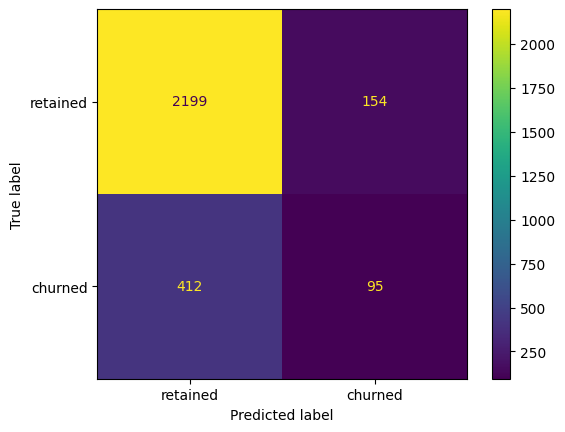

In [89]:
# Generate array of values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, ytest_pred_rf)

# Plot confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(cm, display_labels=['retained', 'churned'])
disp.plot()

The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

### **Task 14. Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

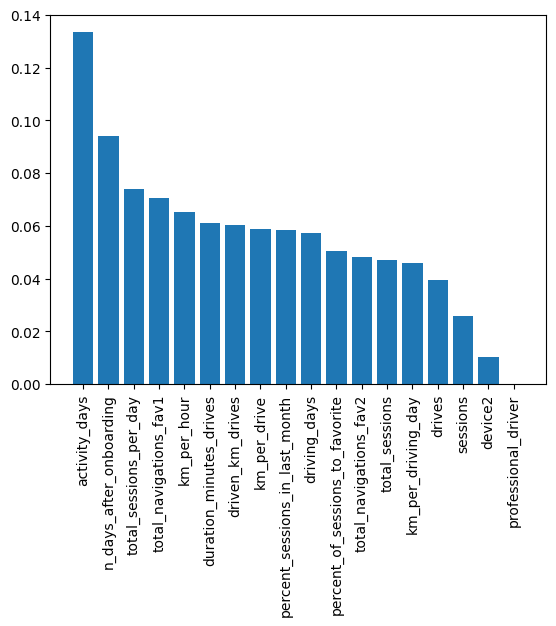

In [97]:
### YOUR CODE HERE ###
#plot_importance(fit_gs)  # ONLY WORKS FOR XGBOOST MODELS
feature_importances = fit_gs.best_estimator_.feature_importances_
feature_names = X_train.columns
feature_importances
feature_importances, feature_names = zip(*sorted(zip(feature_importances, feature_names), reverse=True))
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.xticks([x for x in range(len(feature_importances))], labels=feature_names, rotation=90)
plt.show()

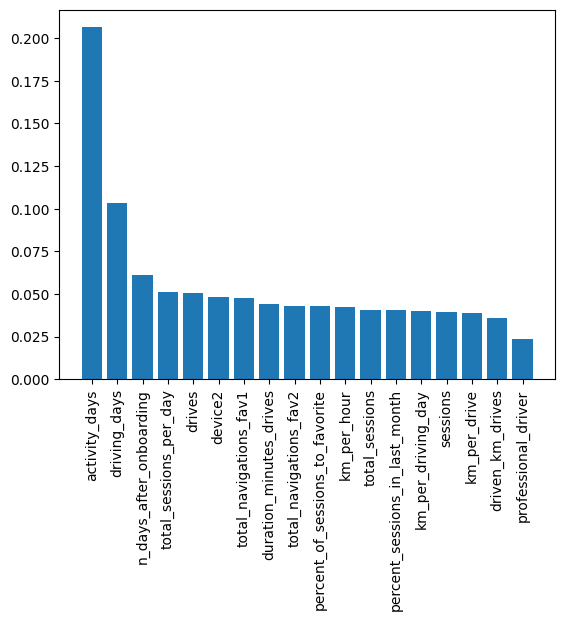

In [98]:
# COMPARE FEATURE IMPORTANCES TO XGBOOST MODEL
feature_importances = fit_gs_xgb.best_estimator_.feature_importances_
feature_names = X_train.columns
feature_importances
feature_importances, feature_names = zip(*sorted(zip(feature_importances, feature_names), reverse=True))
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.xticks([x for x in range(len(feature_importances))], labels=feature_names, rotation=90)
plt.show()

### The following explanation corresponded to the exemplar model. In my models, the engineered features actually did not have particularly high feature importances.

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

### **Task 15. Conclusion**

Now that you've built and tested your machine learning models, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?

5. What could you do to improve this model?

6. What additional features would you like to have to help improve the model?

==> ENTER YOUR RESPONSES TO QUESTIONS 1-6 HERE
1) No, I would not recommend this model for churn prediction. The precision, recall and F1 score were quite low (well below 0.5). This indicates that there are fewer true positives than false positives and false negatives. Therefore, a user that is predicted to churn is still more likely to be retained than actually churn. Similarly, among users that actually churn, the model is more likely to predict them to be retained users than churned users.
2) Splitting the data into training, validation, and test sets reduced the amount of data that the model could be trained on, but increased the confidence in the final model's performance metrics on unseen data.
3) Logistic regression can be advantageous because the model's beta coefficients can lead to more interpretable relationships between the predictor variables and the outcome variable.
4) Tree-based models can be advantageous because they require little preprocessing of data, they can handle extreme outliers, they do not require scaling of data, and they can handle both numeric and categorical variables. Tree-based bodels can often outperform logistic regression models.
5) I could try additional hyperparameter tuning or feature engineering. Additional user data collection could also improve model performance.
6) I would like to have user location data and something like user speed for each drive, which could indicate whether the user predominantly uses it for highway trips vs. city driving.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.